## WeGo Data Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head(100)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,120230801,1,99457985,2023-08-01,22,2200,2689,345132,0,FROM DOWNTOWN,...,36.800000,6.800000,0,0,1,0,0.0,0,0.000000,NaN
96,120230801,1,99457986,2023-08-01,22,2200,2689,345132,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
97,120230801,1,99457987,2023-08-01,22,2200,2689,345133,0,TO DOWNTOWN,...,60.533333,-7.466667,0,0,1,0,0.0,0,1.733333,7.0
98,120230801,1,99457988,2023-08-01,22,2200,2689,345133,0,TO DOWNTOWN,...,35.750000,2.750000,0,0,1,0,0.0,0,0.000000,NaN


In [3]:
wego.shape                                                                             

(350329, 30)

In [4]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [5]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [6]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [7]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [8]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [9]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [10]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [11]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [12]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


In [13]:
# creat a new column called 'DATE_TRIP by combining 'CALENDAR_ID' AND 'TRIP_ID' to get a unique id.
wego['DATE_TRIP'] = wego.apply(lambda row: str(row['CALENDAR_ID']) + '-' + str(row['TRIP_ID']), axis=1)

In [14]:
wego['DATE_TRIP']

0         120230801-345104
1         120230801-345104
2         120230801-345104
3         120230801-345104
4         120230801-345105
                ...       
350324    120230930-353448
350325    120230930-353448
350326    120230930-353449
350327    120230930-353449
350328    120230930-353449
Name: DATE_TRIP, Length: 350329, dtype: object

In [15]:
wego['DATE_TRIP'].nunique()

67370

# Q1
What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?


In [16]:
#to get number of trips (count number of rows)
wego.shape[0]

350329

In [17]:
total_trips = len(wego)

In [18]:
total_trips

350329

In [19]:
on_time_performance = wego['ADJUSTED_ONTIME_COUNT'].sum()/total_trips*100

In [20]:
on_time_performance

77.08411236295025

77% of the trip is on time

In [21]:
#[1]represent on time trips on the dataframe
round(wego['ADJUSTED_ONTIME_COUNT'].value_counts()[1]/wego.shape[0]*100,2)

77.08

 distributions of adherence and headway deviation

In [22]:
wego.head(1)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_TRIP
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,6.5,NaN,120230801-345104


In [23]:
trip_adherence_count = (wego.groupby('DATE_TRIP')[['ADJUSTED_LATE_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_ONTIME_COUNT']]).sum()

In [24]:
trip_adherence_count

,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_ONTIME_COUNT
DATE_TRIP,,,
120230801-345104,0,0,4
120230801-345105,0,0,3
120230801-345106,0,0,4
120230801-345107,0,1,2
120230801-345108,0,0,4
...,...,...,...
120230930-353445,0,0,3
120230930-353446,1,0,1
120230930-353447,1,0,1


In [25]:
perfect_trips = (trip_adherence_count[(trip_adherence_count['ADJUSTED_LATE_COUNT']==0)&(trip_adherence_count['ADJUSTED_EARLY_COUNT']==0)])

In [26]:
perfect_trips

,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_ONTIME_COUNT
DATE_TRIP,,,
120230801-345104,0,0,4
120230801-345105,0,0,3
120230801-345106,0,0,4
120230801-345108,0,0,4
120230801-345109,0,0,4
...,...,...,...
120230930-353434,0,0,3
120230930-353435,0,0,3
120230930-353436,0,0,3


In [27]:
wego['ADHERENCE'].apply(['min','max','mean'])

min    -948.533333
max      88.383333
mean     -3.188796
Name: ADHERENCE, dtype: float64

In [28]:
wego['HDWY_DEV'].agg(['min','max','mean'])

min     -64.000000
max     565.433333
mean      0.518081
Name: HDWY_DEV, dtype: float64

In [43]:
wego['ADHERENCE'].std()

6.89884228017274

In [30]:
wego.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
count,3.503290e+05,350329.000000,3.503290e+05,350329.000000,350329.000000,350329.000000,350329.000000,350329.000000,350318.000000,350329.000000,...,266062.000000,265893.000000,350329.000000,350329.000000,350329.000000,350329.000000,280000.000000,350329.000000,338858.000000,53102.000000
mean,1.202309e+08,1.298465,1.001038e+08,38.348033,3846.948617,1951.130514,351609.792895,0.006631,7.351284,0.579090,...,18.648561,0.518081,0.027902,0.168522,0.770841,0.015263,0.015193,0.011954,2.963915,12.628168
std,5.063417e+01,0.633101,3.227503e+05,20.338342,2042.237357,769.827675,1490.949102,0.097167,4.033002,0.793977,...,14.330568,7.161798,0.164693,0.374329,0.420292,0.122596,0.122320,0.108681,7.402934,6.393862
min,1.202308e+08,1.000000,9.945789e+07,3.000000,300.000000,0.000000,345104.000000,0.000000,1.000000,0.000000,...,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-208.033333,0.000000
25%,1.202308e+08,1.000000,9.989140e+07,22.000000,2211.000000,1391.000000,350900.000000,0.000000,4.000000,0.000000,...,11.000000,-2.316667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,1.202308e+08,1.000000,1.001346e+08,50.000000,5006.000000,2012.000000,352001.000000,0.000000,6.000000,0.000000,...,16.183333,0.033333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,1.202309e+08,1.000000,1.003481e+08,55.000000,5505.000000,2585.000000,352669.000000,0.000000,10.000000,1.000000,...,23.250000,2.483333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.950000,16.000000
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9975.000000,3173.000000,354106.000000,4.000000,17.000000,2.000000,...,590.433333,565.433333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,956.500000,118.000000


In [44]:
adherence_mean = wego['ADHERENCE'].mean()
adherence_std = wego['ADHERENCE'].std()

[Text(0.5, 1.0, 'Adherence Distribution Excluding Outliers'),
 Text(0.5, 0, 'Adherence')]

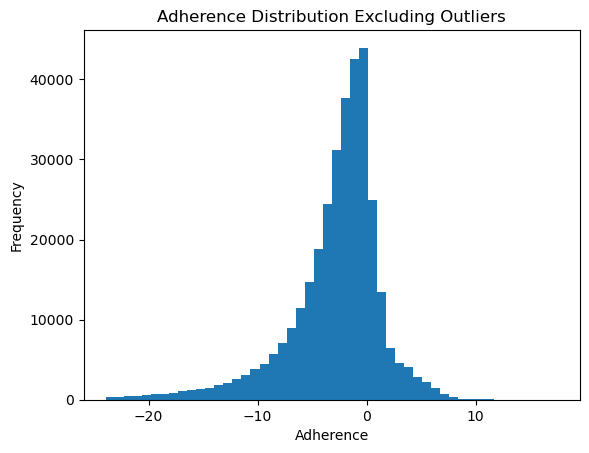

In [33]:
ax = (wego[wego['ADHERENCE'].between(adherence_mean - adherence_std*3,
                                   adherence_mean + adherence_std*3,
                                   inclusive='both')] ['ADHERENCE']
      .plot(kind='hist',  bins=50))

ax.set(title='Adherence Distribution Excluding Outliers',
       xlabel='Adherence')

In [37]:
hdwy_mean = wego['HDWY_DEV'].mean()
hdwy_std = wego['HDWY_DEV'].std()

[Text(0.5, 1.0, 'Headway Deviation Distribution Excluding Outliers'),
 Text(0.5, 0, 'Headway Deviation')]

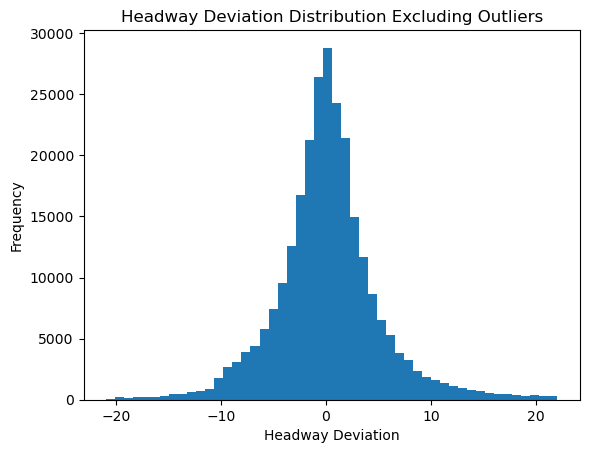

In [45]:
hdwy_mean = wego['HDWY_DEV'].mean()
hdwy_std = wego['HDWY_DEV'].std()
ax= (wego[wego['HDWY_DEV'].between(hdwy_mean - hdwy_std*3, 
                                  hdwy_mean + hdwy_std*3, 
                                  inclusive='both')]['HDWY_DEV']
     .plot(kind='hist', bins=50))

ax.set(title='Headway Deviation Distribution Excluding Outliers',
    xlabel='Headway Deviation')

# Q2 
How does direction of travel, route, or location affect the headway and on-time performance?

In [42]:
wego[wego['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']['ADHERENCE'].apply(['min','max','mean','median'])

min      -948.533333
max        76.766666
mean       -3.960287
median     -2.516666
Name: ADHERENCE, dtype: float64

In [52]:
wego[wego['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']['ADHERENCE'].apply(['min','max','mean','median'])

min      -618.166666
max        88.383333
mean       -2.321804
median     -1.500000
Name: ADHERENCE, dtype: float64

In [51]:
wego.groupby('ROUTE_DIRECTION_NAME')[['HDWY_DEV','ADHERENCE']].describe()

HDWY_DEV                                                 \
                         count      mean       std        min   25%       50%   
ROUTE_DIRECTION_NAME                                                            
FROM DOWNTOWN         141392.0  0.579990  7.773842 -55.533334 -2.65  0.033333   
TO DOWNTOWN           124501.0  0.447773  6.395390 -64.000000 -2.00  0.033333   

                                       ADHERENCE                      \
                       75%         max     count      mean       std   
ROUTE_DIRECTION_NAME                                                   
FROM DOWNTOWN         2.85  565.433333  179306.0 -3.960287  7.234279   
TO DOWNTOWN           2.15  543.833333  159555.0 -2.321804  6.391098   

                                                                           
                             min       25%       50%       75%        max  
ROUTE_DIRECTION_NAME                                                       
FROM DOWNTOWN        -948.533333 -5.466666 -2.516666 -0.633333  76.766666  
TO DOWNTOWN          -618.166666 -3.666666 -1.500000 -0.100000  88.383333

#to downtown seems a better performance 

C:\Users\zenas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


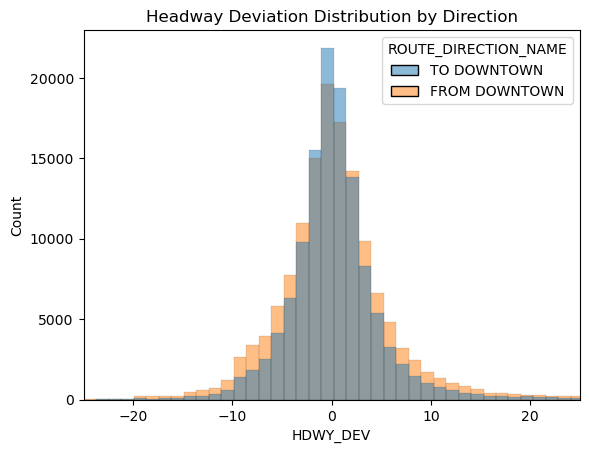

In [84]:

sns.histplot(data=wego, x='HDWY_DEV', hue='ROUTE_DIRECTION_NAME', bins=500) #kde=True)
plt.title('Headway Deviation Distribution by Direction')
plt.xlabel('minutes')
plt.ylabel('Frequency')
plt.xlim(-25,25)
#plt.ylim(0,65000)
plt.show()

C:\Users\zenas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


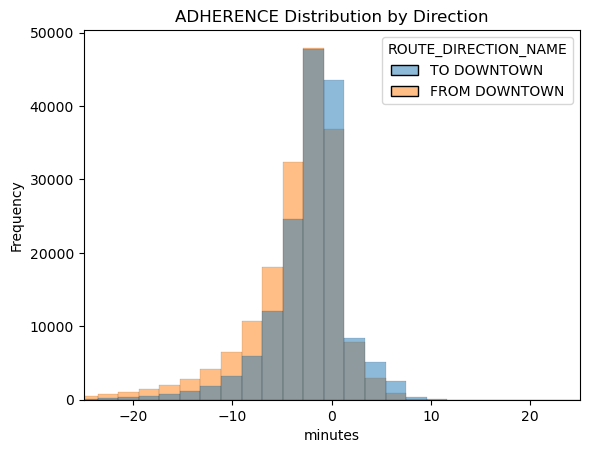

In [85]:
sns.histplot(data=wego, x='ADHERENCE', hue='ROUTE_DIRECTION_NAME', bins=500) 
plt.title('ADHERENCE Distribution by Direction')
plt.xlabel('minutes')
plt.ylabel('Frequency')
plt.xlim(-25,25)
#plt.ylim(0,65000)
plt.show()

In [66]:
wego['HDWY_DEV'].min()

-64.0

In [67]:
wego['HDWY_DEV'].max()

565.433333